## Capstone Project: Stock Sector Performance Prediction Based on Economic Indicators


This project analyzes the relationship between economic conditions and the performance of three stock market sectors: Technology (XLK), Healthcare (XLV), and Energy (XLE). Using a combination of classification techniques, Random Forest models were applied to predict whether the sectors' prices would go up or down based on economic indicators such as GDP, interest rates, inflation, and unemployment. 

## Exploratory Data Analysis (EDA)

### Datasets

| Description | Filename | Start Date | End Date | Max | Min | Mean | Standard Dev | Missing Values |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| GDP Growth Rate | GDP.csv | 1947-01-01 | 2024-04-01 | 28629.153 | 243.164 | 7296.742 | 7564.34 | None |
| Interest Rates | FEDFUNDS.csv | 1954-07-01 | 2024-07-01 | 19.10 | 0.05 | 4.60 | 3.578 | None |
| Inflation Rate | FPCPITOTLZGUSA.csv | 1960-01-01 | 2023-01-01 | 13.549 | -0.355 | 3.770 | 2.762 | None |
| Unemployment Rate | UNRATE.csv | 1948-01-01 | 2024-07-01 | 14.80 | 2.50 | 5.691 | 1.710 | None |
| Consumer Confidence Ind | CCI.csv | 1960-01-01 | 2024-01-01 | 102.8489 | 96.20 | 100.00 | 1.46 | None |
| Retail Sales | RSXFS.csv | 1992-01-01 | 2024-07-01 | 615001.00 | 146805.00 | 333517.93 | 122043.849 | None |
| Industrial Production Index | INDPRO.csv | 1919-01-01 | 2024-07-01 | 104.10 | 3.68 | 45.98 | 34.85 | None |
| Crude Oil Sales | POILBREUSDM.csv | 1990-01-01 | 2024-06-01 | 133.50 | 10.16 | 52.75 | 32.77 | None |
| 10-Year Treasury Yield | DGS10.csv | 1962-01-02 | 2024-08-26 | 15.84 | 0.52 | 5.85 | 2.96 | None |
| XLK - Technology ETF | XLK.csv | 1988-12-23 | 2024-08-23 | 237.68 | 11.58 | 54.82 | 48.94 | None |
| XLV - Healthcare ETF | XLV.csv | 1988-12-23 | 2024-08-23 | 155.45 | 21.88 | 59.34 | 37.42 | None |
| XLE - Energy ETF | XLE.csv | 1988-12-23 | 2024-08-23 | 101.29 | 19.80 | 57.61 | 21.15 | None |

XLK - Max, Min, Mean, Standard Dev values for the "close" column <br>
XLV - Max, Min, Mean, Standard Dev values for the "close" column <br>
XLE - Max, Min, Mean, Standard Dev values for the "close" column <br>

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### GDP Growth Rate

In [3]:
# Import and analyze the GDP dataset 
df_gdp = pd.read_csv("data/GDP.csv")

# Count missing values in the 'Data' and 'GDP' columns of the GDP data
missing_data_count = df_gdp['DATE'].isna().sum()
missing_gdp_count = df_gdp['GDP'].isna().sum()

print(f"Missing values in 'Data' column: {missing_data_count}")
print(f"Missing values in 'GDP' column: {missing_gdp_count}")

Missing values in 'Data' column: 0
Missing values in 'GDP' column: 0


In [4]:
# Descriptive statistics of the GDP dataset 
df_gdp.describe()

,GDP
count,310.000000
mean,7296.742271
std,7564.347467
min,243.164000
25%,808.645250
50%,4415.433500
75%,12707.268000
max,28629.153000


### Interest Rates

In [5]:
# Interest Rates Dataset
df_interest = pd.read_csv("data/FEDFUNDS.csv")

# Count missing values in the columns
missing_data_count = df_interest['DATE'].isna().sum()
missing_fedfunds_count = df_interest['FEDFUNDS'].isna().sum()

print(f"Missing values in 'Data' column: {missing_data_count}")
print(f"Missing values in 'FEDFUNDS' column: {missing_fedfunds_count}")

Missing values in 'Data' column: 0
Missing values in 'FEDFUNDS' column: 0


In [6]:
# Descriptive statistics of the Interest Rates dataset 
df_interest.describe()

,FEDFUNDS
count,841.000000
mean,4.607729
std,3.578051
min,0.050000
25%,1.820000
50%,4.250000
75%,6.200000
max,19.100000


### Inflation Rate

In [7]:
# Inflation Rate Dataset
df_inflation = pd.read_csv("data/FPCPITOTLZGUSA.csv")

# Count missing values in the columns
missing_date_count = df_inflation['DATE'].isna().sum()
missing_inflation_count = df_inflation['FPCPITOTLZGUSA'].isna().sum()

print(f"Missing values in 'Data' column: {missing_date_count}")
print(f"Missing values in 'FEDFUNDS' column: {missing_inflation_count}")

Missing values in 'Data' column: 0
Missing values in 'FEDFUNDS' column: 0


In [8]:
df_inflation.describe()

,FPCPITOTLZGUSA
count,64.000000
mean,3.770332
std,2.762789
min,-0.355546
25%,1.876588
50%,3.021948
75%,4.399866
max,13.549202


### Unemployment Rate

In [9]:
# Unemployment Rate dataset
df_unemployment = pd.read_csv("data/UNRATE.csv")

# Count missing values in the 'Data' and 'UNRATE' columns of the Unemployment data
missing_date_count = df_unemployment['DATE'].isna().sum()
missing_unrate_count = df_unemployment['UNRATE'].isna().sum()

print(f"Missing values in 'Data' column: {missing_date_count}")
print(f"Missing values in 'UNRATE' column: {missing_unrate_count}")

Missing values in 'Data' column: 0
Missing values in 'UNRATE' column: 0


In [10]:
df_unemployment.describe()

,UNRATE
count,919.000000
mean,5.691404
std,1.710120
min,2.500000
25%,4.400000
50%,5.500000
75%,6.700000
max,14.800000


### Consumer Confidence Index

In [11]:
# Consumer Confidence Index dataset
df_cci = pd.read_csv("data/CCI.csv")

# Count missing values in the 'Data' and 'UNRATE' columns of the Unemployment data
missing_date_count = df_cci['DATE'].isna().sum()
missing_cci_count = df_cci['CSCICP03USM665S'].isna().sum()

print(f"Missing values in 'Data' column: {missing_date_count}")
print(f"Missing values in 'CSCICP03USM665S' column: {missing_cci_count}")

Missing values in 'Data' column: 0
Missing values in 'CSCICP03USM665S' column: 0


In [12]:
df_cci.describe()

,CSCICP03USM665S
count,769.000000
mean,100.000001
std,1.464519
min,96.201320
25%,98.902300
50%,100.487500
75%,101.054200
max,102.848900


### Retail Sales

In [13]:
# Retail Sales dataset
df_rs = pd.read_csv("data/RSXFS.csv")

# Count missing values in the 'Data' and 'UNRATE' columns of the Unemployment data
missing_date_count = df_rs['DATE'].isna().sum()
missing_rs_count = df_rs['RSXFS'].isna().sum()

print(f"Missing values in 'DATE' column: {missing_date_count}")
print(f"Missing values in 'RSXFS' column: {missing_rs_count}")

Missing values in 'DATE' column: 0
Missing values in 'RSXFS' column: 0


In [14]:
df_rs.describe()

,RSXFS
count,391.000000
mean,333517.933504
std,122043.849699
min,146805.000000
25%,246016.000000
50%,322348.000000
75%,398790.500000
max,615001.000000


### Industrial Production Index

In [15]:
# Industrial Production Index dataset
df_ipi = pd.read_csv("data/INDPRO.csv")

# Count missing values in the 'Data' and 'INDPRO' columns of the Industrial Production Index
missing_date_count = df_ipi['DATE'].isna().sum()
missing_indpro_count = df_ipi['INDPRO'].isna().sum()

print(f"Missing values in 'DATE' column: {missing_date_count}")
print(f"Missing values in 'INDPRO' column: {missing_indpro_count}")

Missing values in 'DATE' column: 0
Missing values in 'INDPRO' column: 0


In [16]:
df_ipi.describe()

,INDPRO
count,1267.000000
mean,45.981858
std,34.859894
min,3.682700
25%,13.762900
50%,39.114500
75%,84.324300
max,104.103800


### Crude Oil Sales

In [17]:
# Crude Oil Sales dataset
df_cos = pd.read_csv("data/POILBREUSDM.csv")

# Count missing values in the 'Data' and 'INDPRO' columns of the Crude Oil Sales dataset
missing_date_count = df_cos['DATE'].isna().sum()
missing_cos_count = df_cos['POILBREUSDM'].isna().sum()

print(f"Missing values in 'DATE' column: {missing_date_count}")
print(f"Missing values in 'POILBREUSDM' column: {missing_cos_count}")

Missing values in 'DATE' column: 0
Missing values in 'POILBREUSDM' column: 0


In [18]:
df_cos.describe()

,POILBREUSDM
count,414.000000
mean,52.752414
std,32.779779
min,10.160000
25%,20.937658
50%,47.882727
75%,76.050000
max,133.585217


In [19]:
df_cos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         414 non-null    object 
 1   POILBREUSDM  414 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.6+ KB


### 10-Year Treasury Yield

In [20]:
# Crude Oil Sales dataset
df_ty = pd.read_csv("data/DGS10.csv")

# Count missing values in the 'Data' and 'DGS10' columns of the 10-Year Treasury Yield dataset
missing_date_count = df_ty['DATE'].isna().sum()
missing_cos_count = df_ty['DGS10'].isna().sum()

print(f"Missing values in 'DATE' column: {missing_date_count}")
print(f"Missing values in 'DGS10' column: {missing_cos_count}")

Missing values in 'DATE' column: 0
Missing values in 'DGS10' column: 0


In [21]:
# Convert the DGS10 column from object to float64 format
df_ty['DGS10'] = pd.to_numeric(df_ty['DGS10'], errors='coerce')

In [22]:
df_ty.describe()

,DGS10
count,15649.000000
mean,5.853911
std,2.963275
min,0.520000
25%,3.860000
50%,5.570000
75%,7.590000
max,15.840000


### XLK - Technology Select Sector SPDR Fund

In [23]:
# XLK ETF - Technology Select Sector dataset
df_xlk = pd.read_csv("data/XLK.csv")

# Count missing values in the 'Data' and 'DGS10' columns of the 10-Year Treasury Yield dataset
missing_date_count = df_xlk['date'].isna().sum()
missing_open_count = df_xlk['open'].isna().sum()
missing_high_count = df_xlk['high'].isna().sum()
missing_low_count = df_xlk['low'].isna().sum()
missing_close_count = df_xlk['close'].isna().sum()
missing_volume_count = df_xlk['volume'].isna().sum()

print(f"Missing values in 'date' column: {missing_date_count}")
print(f"Missing values in 'open' column: {missing_open_count}")
print(f"Missing values in 'high' column: {missing_high_count}")
print(f"Missing values in 'low' column: {missing_low_count}")
print(f"Missing values in 'close' column: {missing_close_count}")

Missing values in 'date' column: 0
Missing values in 'open' column: 0
Missing values in 'high' column: 0
Missing values in 'low' column: 0
Missing values in 'close' column: 0


In [24]:
df_xlk.describe()

,open,high,low,close,volume,pct_change
count,6458.000000,6458.000000,6458.000000,6458.000000,6.458000e+03,6458.000000
mean,54.825279,55.277076,54.334667,54.828551,6.767089e+06,0.000443
std,48.925372,49.316910,48.518279,48.948080,6.329055e+06,0.016599
min,11.500000,11.820000,11.400000,11.580000,3.800000e+04,-0.140000
25%,22.220000,22.380000,22.000000,22.192500,1.345200e+06,-0.010000
50%,33.880000,34.235000,33.561250,33.903150,5.979414e+06,0.000000
75%,65.562500,66.285000,64.880000,65.600000,9.416592e+06,0.010000
max,238.040000,238.140000,234.570000,237.680000,6.826952e+07,0.160000


### XLV - Health Care Select Sector SPDR Fund

In [25]:
# XLV ETF - Health Care Select Sector dataset
df_xlv = pd.read_csv("data/XLV.csv")

# Count missing values in the date, open, high, low, and close columns of the XLV dataset
missing_date_count = df_xlv['date'].isna().sum()
missing_open_count = df_xlv['open'].isna().sum()
missing_high_count = df_xlv['high'].isna().sum()
missing_low_count = df_xlv['low'].isna().sum()
missing_close_count = df_xlv['close'].isna().sum()
missing_volume_count = df_xlv['volume'].isna().sum()

print(f"Missing values in 'date' column: {missing_date_count}")
print(f"Missing values in 'open' column: {missing_open_count}")
print(f"Missing values in 'high' column: {missing_high_count}")
print(f"Missing values in 'low' column: {missing_low_count}")
print(f"Missing values in 'close' column: {missing_close_count}")

Missing values in 'date' column: 0
Missing values in 'open' column: 0
Missing values in 'high' column: 0
Missing values in 'low' column: 0
Missing values in 'close' column: 0


In [26]:
df_xlv.describe()

,open,high,low,close,volume,pct_change
count,6458.000000,6458.000000,6458.000000,6458.000000,6.458000e+03,6458.000000
mean,59.336306,59.695654,58.947784,59.341502,5.836245e+06,0.000348
std,37.411962,37.619368,37.200371,37.424611,5.620338e+06,0.011690
min,21.000000,22.100000,21.000000,21.880000,9.000000e+02,-0.100000
25%,29.843800,30.000000,29.626250,29.812500,5.827750e+05,-0.010000
50%,35.950000,36.090000,35.725000,35.945000,5.455274e+06,-0.000000
75%,83.405000,83.950000,82.945000,83.470000,8.693856e+06,0.010000
max,155.200000,155.555000,154.650000,155.450000,6.647018e+07,0.120000


### XLE - Energy Select Sector SPDR Fund

In [27]:
# XLV ETF - Health Care Select Sector dataset
df_xle = pd.read_csv("data/XLE.csv")

# Count missing values in the date, open, high, low, and close columns of the XLV dataset
missing_date_count = df_xle['date'].isna().sum()
missing_open_count = df_xle['open'].isna().sum()
missing_high_count = df_xle['high'].isna().sum()
missing_low_count = df_xle['low'].isna().sum()
missing_close_count = df_xle['close'].isna().sum()
missing_volume_count = df_xle['volume'].isna().sum()

print(f"Missing values in 'date' column: {missing_date_count}")
print(f"Missing values in 'open' column: {missing_open_count}")
print(f"Missing values in 'high' column: {missing_high_count}")
print(f"Missing values in 'low' column: {missing_low_count}")
print(f"Missing values in 'close' column: {missing_close_count}")

Missing values in 'date' column: 0
Missing values in 'open' column: 0
Missing values in 'high' column: 0
Missing values in 'low' column: 0
Missing values in 'close' column: 0


In [28]:
df_xle.describe()

,open,high,low,close,volume,pct_change
count,6458.000000,6458.000000,6458.000000,6458.000000,6.458000e+03,6458.000000
mean,57.622699,58.169853,57.031253,57.614981,1.586796e+07,0.000364
std,21.151065,21.287507,21.000960,21.151068,1.304242e+07,0.018457
min,19.400000,20.590000,19.380000,19.800000,7.400000e+03,-0.200000
25%,36.342500,36.572500,35.932500,36.230000,6.115286e+06,-0.010000
50%,60.170000,60.750000,59.620000,60.240000,1.454270e+07,0.000000
75%,74.450000,75.157500,73.770000,74.465000,2.254036e+07,0.010000
max,101.240000,101.520000,100.980000,101.290000,9.935671e+07,0.160000


### Time Series Analysis Overview:

In this project, I'm performing time series analysis to study how the stock performance of three sectors (Technology - XLK, Healthcare - XLV, and Energy - XLE) behaves over time and how it is influenced by key economic indicators (GDP, interest rates, inflation, and unemployment rates).

The goal of the analysis is to:

Forecast future performance of these ETFs based on their historical trends.
Understand how changes in economic conditions impact the movement of these sector-specific ETFs.
Key Steps:
Data Merging: We have aligned daily ETF price data with economic indicators (GDP growth rate, interest rates, inflation, and unemployment). This allows us to analyze the relationship between sector performance and the broader economic environment.
Time Series Modeling: By analyzing this combined data, we will apply time series models such as ARIMA or SARIMA to predict future prices and assess correlations between ETF prices and economic factors over time.
This analysis helps identify how different sectors perform during varying economic conditions, answering the research question: Which sectors perform best during periods of economic growth and recession?



**Loading Data**: ETF and economic indicator data are loaded from CSV files.

**Datetime Conversion**: The date columns in ETF data and DATE columns in economic data are converted to datetime format for proper alignment.

**Resampling Economic Data**: Economic data, which may be monthly or quarterly, is resampled to a daily frequency, with missing values forward-filled using .ffill().

**Merging**: The ETF data (XLE, XLK, XLV) is merged with the economic indicators based on the date index.

**Display Results**: The first few rows of the combined datasets are printed for verification.


In [29]:

# Step 1: Load the CSV files for ETFs and Economic indicators from disk into Pandas DataFrames
fedfunds_df = pd.read_csv('data/FEDFUNDS.csv')
inflation_df = pd.read_csv('data/FPCPITOTLZGUSA.csv')
gdp_df = pd.read_csv('data/GDP.csv')
unemployment_df = pd.read_csv('data/UNRATE.csv')

consumer_confidence_df = pd.read_csv('data/CCI.csv')
retail_sales_df = pd.read_csv('data/RSXFS.csv')
industrial_prod_df = pd.read_csv('data/INDPRO.csv')
crude_oil_df = pd.read_csv('data/POILBREUSDM.csv')
ten_year_treasury_df = pd.read_csv('data/DGS10.csv')

xle_df = pd.read_csv('data/XLE.csv')
xlk_df = pd.read_csv('data/XLK.csv')
xlv_df = pd.read_csv('data/XLV.csv')

# Step 2: Convert the date columns to datetime format and set them as the index for easier merging
# ETF data (XLE, XLK, XLV) are daily, so we directly set the date as index

xle_df['date'] = pd.to_datetime(xle_df['date'])
xlk_df['date'] = pd.to_datetime(xlk_df['date'])
xlv_df['date'] = pd.to_datetime(xlv_df['date'])

# Set date as the index for ETF data
xle_df.set_index('date', inplace=True)
xlk_df.set_index('date', inplace=True)
xlv_df.set_index('date', inplace=True)

# Step 3: Convert the date column for economic indicators to datetime and set it as the index
fedfunds_df['DATE'] = pd.to_datetime(fedfunds_df['DATE'])
inflation_df['DATE'] = pd.to_datetime(inflation_df['DATE'])
gdp_df['DATE'] = pd.to_datetime(gdp_df['DATE'])
unemployment_df['DATE'] = pd.to_datetime(unemployment_df['DATE'])
consumer_confidence_df['DATE'] = pd.to_datetime(consumer_confidence_df['DATE'])
retail_sales_df['DATE'] = pd.to_datetime(retail_sales_df['DATE'])
industrial_prod_df['DATE'] = pd.to_datetime(industrial_prod_df['DATE'])
crude_oil_df['DATE'] = pd.to_datetime(crude_oil_df['DATE'])
ten_year_treasury_df['DATE'] = pd.to_datetime(ten_year_treasury_df['DATE'])

# Set DATE as the index for economic data
fedfunds_df.set_index('DATE', inplace=True)
inflation_df.set_index('DATE', inplace=True)
gdp_df.set_index('DATE', inplace=True)
unemployment_df.set_index('DATE', inplace=True)

consumer_confidence_df.set_index('DATE', inplace=True)
retail_sales_df.set_index('DATE', inplace=True)
industrial_prod_df.set_index('DATE', inplace=True)
crude_oil_df.set_index('DATE', inplace=True)
ten_year_treasury_df.set_index('DATE', inplace=True)

# Step 4: Resample economic indicators to daily frequency and forward-fill missing values
# This is necessary because the economic data may be monthly or quarterly
fedfunds_df_daily = fedfunds_df.resample('D').ffill()
inflation_df_daily = inflation_df.resample('D').ffill()
gdp_df_daily = gdp_df.resample('D').ffill()
unemployment_df_daily = unemployment_df.resample('D').ffill()

consumer_confidence_daily = consumer_confidence_df.resample('D').ffill()
retail_sales_daily = retail_sales_df.resample('D').ffill()
industrial_prod_daily = industrial_prod_df.resample('D').ffill()
crude_oil_daily = crude_oil_df.resample('D').ffill()
ten_year_treasury_daily = ten_year_treasury_df.resample('D').ffill()

# Step 5: Merge ETF data (XLE) with economic indicators on the date index
# We use 'inner' join to only keep dates common across all datasets
xle_combined_df = xle_df.join([fedfunds_df_daily, inflation_df_daily, gdp_df_daily, 
                               unemployment_df_daily, consumer_confidence_daily, 
                               retail_sales_daily,industrial_prod_daily,
                               crude_oil_daily, ten_year_treasury_daily], how='inner')

# Merging XLK (Tech ETF) with the economic indicators
xlk_combined_df = xlk_df.join([fedfunds_df_daily, inflation_df_daily, gdp_df_daily, 
                               unemployment_df_daily, consumer_confidence_daily, 
                               retail_sales_daily,industrial_prod_daily,
                               crude_oil_daily, ten_year_treasury_daily], how='inner')

# Merging XLV (Healthcare ETF) with the economic indicators
xlv_combined_df = xlv_df.join([fedfunds_df_daily, inflation_df_daily, gdp_df_daily, 
                               unemployment_df_daily, consumer_confidence_daily, 
                               retail_sales_daily,industrial_prod_daily,
                               crude_oil_daily, ten_year_treasury_daily], how='inner')

# Step 6: Display the merged datasets to verify correctness
print("XLE Combined Data:")
print(xle_combined_df.head())

print("\nXLK Combined Data:")
print(xlk_combined_df.head())

print("\nXLV Combined Data:")
print(xlv_combined_df.head())

XLE Combined Data:
               open     high      low    close  volume  pct_change  FEDFUNDS  \
1998-12-23  23.3438  23.7500  23.3125  23.7500   67800        0.02      4.68   
1998-12-24  23.8125  23.8125  23.5938  23.6250   12300       -0.01      4.68   
1998-12-28  23.7500  23.7500  23.3438  23.5000   13500       -0.01      4.68   
1998-12-29  23.5625  23.7344  23.3438  23.7344   22000        0.01      4.68   
1998-12-30  23.7188  23.7188  23.3594  23.3750   21800       -0.02      4.68   

            FPCPITOTLZGUSA       GDP  UNRATE  CSCICP03USM665S     RSXFS  \
1998-12-23        1.552279  9293.991     4.4         101.9019  223179.0   
1998-12-24        1.552279  9293.991     4.4         101.9019  223179.0   
1998-12-28        1.552279  9293.991     4.4         101.9019  223179.0   
1998-12-29        1.552279  9293.991     4.4         101.9019  223179.0   
1998-12-30        1.552279  9293.991     4.4         101.9019  223179.0   

             INDPRO  POILBREUSDM DGS10  
1998-12-

ADF Statistic: -1.8369262371955768
p-value: 0.36228899109718515
RMSE: 1.7668143123880093


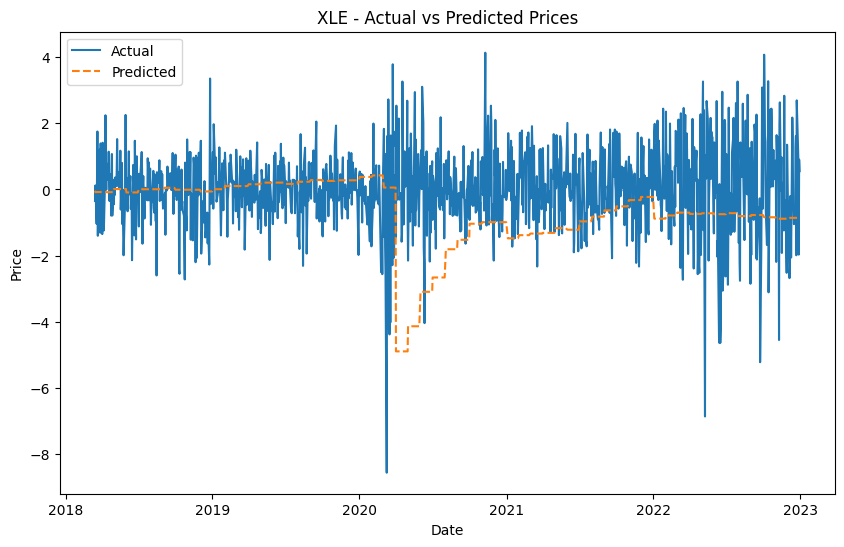

In [31]:
# Step 1: Select the target (XLE's "close" prices) and the economic indicators
target = xle_combined_df['close']
exog = xle_combined_df[['FEDFUNDS', 'FPCPITOTLZGUSA', 'GDP', 'UNRATE']]

# Step 2: Align the indices to ensure they match between target and economic indicators
target, exog = target.align(exog, join='inner')

# Step 3: Check for stationarity using the Augmented Dickey-Fuller test
adf_test = sm.tsa.adfuller(target)
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

# Step 4: Apply differencing if needed (based on p-value from ADF test)
# The Augmented Dickey-Fuller (ADF) test checks if the time series is 
# stationary. A p-value greater than 0.05 indicates that the time series is non-stationary.
# In this case, we applied differencing to transform the series into a stationary form, 
# as required for ARIMA models. Non-stationary data can lead to unreliable predictions, 
# which is why we need to ensure stationarity before modeling.
if adf_test[1] > 0.05:
    target_diff = target.diff().dropna()  # Differencing to make data stationary
    # Align the exog to drop the first row after differencing
    exog_diff = exog.loc[target_diff.index]
else:
    target_diff = target
    exog_diff = exog

# Step 5: Split data into train and test sets
train_size = int(len(target_diff) * 0.8)  # 80% train, 20% test
train_target, test_target = target_diff[:train_size], target_diff[train_size:]
train_exog, test_exog = exog_diff[:train_size], exog_diff[train_size:]

# Step 6: Build the ARIMA model with exogenous variables
model = sm.tsa.ARIMA(train_target, exog=train_exog, order=(1,1,1))  # ARIMA(1,1,1) is a common starting point
model_fit = model.fit()

# Step 7: Make predictions
predictions = model_fit.forecast(steps=len(test_target), exog=test_exog)

# Step 8: Evaluate model performance using RMSE
rmse = np.sqrt(mean_squared_error(test_target, predictions))
print(f'RMSE: {rmse}')

# Step 9: Plot the actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(test_target.index, test_target, label='Actual')
plt.plot(test_target.index, predictions, label='Predicted', linestyle='--')
plt.title('XLE - Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



In [32]:
# Function to perform ARIMA time series modeling with exogenous variables
def arima_model_with_exog(etf_combined_df, etf_name):
    """
    Function to apply ARIMA model on ETF with exogenous economic indicators and plot predictions.
    
    Parameters:
    etf_combined_df (pd.DataFrame): Dataframe containing 'close' prices and economic indicators.
    etf_name (str): Name of the ETF (e.g., 'XLE', 'XLK', 'XLV').
    
    Returns:
    None: Prints ADF test results, RMSE, and plots actual vs predicted values.
    """
    
    # Step 1: Select the target (ETF's "close" prices) and the economic indicators
    target = etf_combined_df['close']
    exog = etf_combined_df[['FEDFUNDS', 'FPCPITOTLZGUSA', 'GDP', 'UNRATE']]
    
    # Step 2: Align the indices to ensure they match between target and economic indicators
    target, exog = target.align(exog, join='inner')
    
    # Step 3: Check for stationarity using the Augmented Dickey-Fuller test
    adf_test = sm.tsa.adfuller(target)
    print(f'{etf_name} ADF Statistic: {adf_test[0]}')
    print(f'{etf_name} p-value: {adf_test[1]}')
    
    # Step 4: Apply differencing if needed (based on p-value from ADF test)
    if adf_test[1] > 0.05:
        target_diff = target.diff().dropna()  # Differencing to make data stationary
        exog_diff = exog.loc[target_diff.index]  # Align the exog to the differenced target
    else:
        target_diff = target
        exog_diff = exog
    
    # Step 5: Split data into train and test sets
    train_size = int(len(target_diff) * 0.8)  # 80% train, 20% test
    train_target, test_target = target_diff[:train_size], target_diff[train_size:]
    train_exog, test_exog = exog_diff[:train_size], exog_diff[train_size:]
    
    # Step 6: Build the ARIMA model with exogenous variables
    model = sm.tsa.ARIMA(train_target, exog=train_exog, order=(1,1,1))  # ARIMA(1,1,1) as a starting point
    model_fit = model.fit()
    
    # Step 7: Make predictions
    predictions = model_fit.forecast(steps=len(test_target), exog=test_exog)
    
    # Step 8: Evaluate model performance using RMSE
    rmse = np.sqrt(mean_squared_error(test_target, predictions))
    print(f'{etf_name} RMSE: {rmse}')
    
    # Step 9: Plot the actual vs predicted values
    plt.figure(figsize=(10,6))
    plt.plot(test_target.index, test_target, label='Actual')
    plt.plot(test_target.index, predictions, label='Predicted', linestyle='--')
    plt.title(f'{etf_name} - Actual vs Predicted Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


XLE ADF Statistic: -1.8369262371955768
XLE p-value: 0.36228899109718515
XLE RMSE: 1.7668143123880093


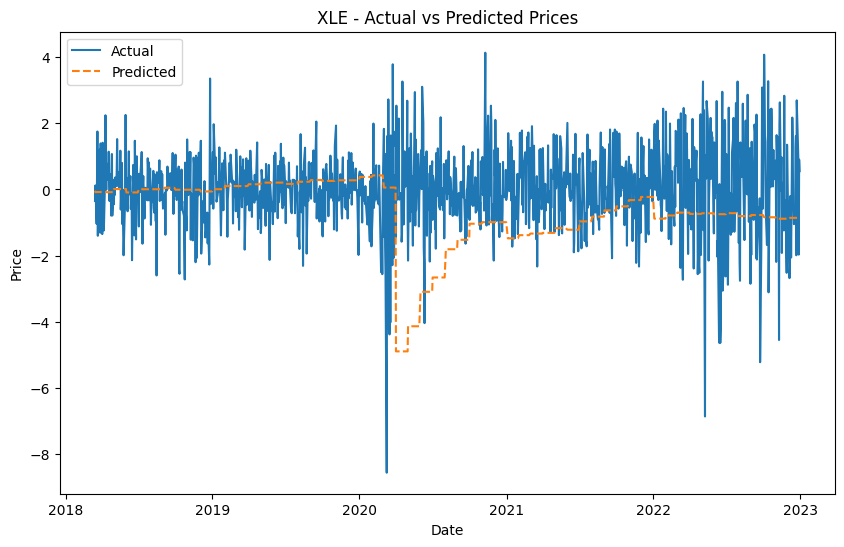

In [33]:
arima_model_with_exog(xle_combined_df, 'XLE')

XLK ADF Statistic: 0.48436318768382264
XLK p-value: 0.9843899985263974
XLK RMSE: 1.9484350880903307


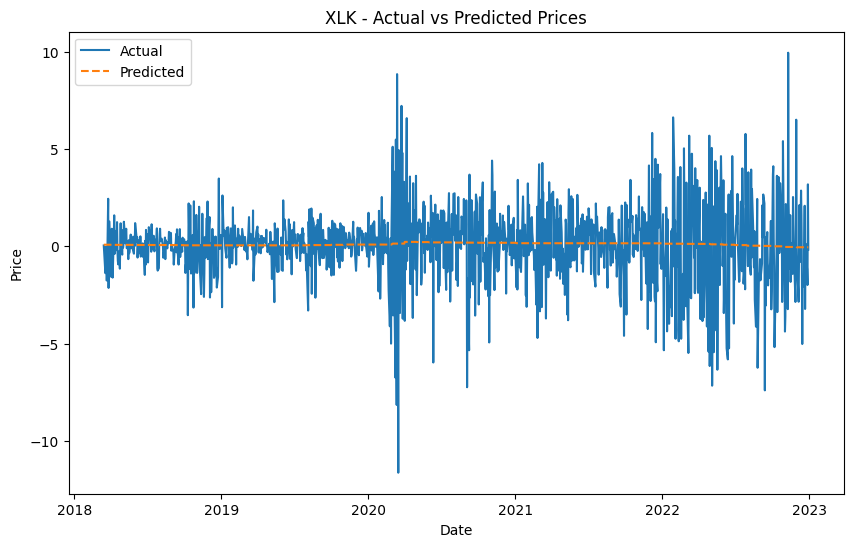

In [34]:
arima_model_with_exog(xlk_combined_df, 'XLK')

XLV ADF Statistic: 1.7672640070370171
XLV p-value: 0.9982818319218889
XLV RMSE: 1.3288623494077512


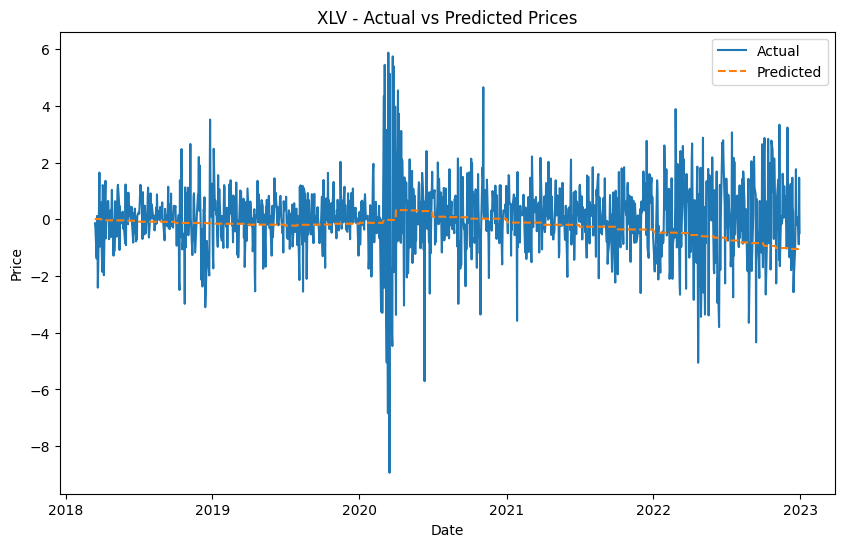

In [35]:
arima_model_with_exog(xlv_combined_df, 'XLV')

### Interpretation of the Results:

**Note on Stationarity**:

Stationarity in a time series means that its statistical properties, like mean, variance, and autocorrelation, remain constant over time. In time series modeling, stationarity is crucial because non-stationary data can lead to unreliable predictions.

**Stationarity (ADF Test)**:

XLE: ADF statistic of -1.8369 and p-value of 0.3623 indicate that the XLE series is non-stationary, and differencing was required to make it suitable for ARIMA modeling. <br>

XLK: ADF statistic of 0.4844 and p-value of 0.9844 suggest that the XLK series is highly non-stationary, requiring significant preprocessing before modeling.<br>

XLV: ADF statistic of 1.7673 and p-value of 0.9983 show that XLV is also highly non-stationary, requiring significant preprocessing before modeling.<br>

**Model Performance (RMSE)**:

I used RMSE (Root Mean Squared Error) to measure how well the model predicts by showing the average difference between the predicted and actual values. It gives more weight to bigger mistakes, making it good for spotting large errors.

XLE RMSE: 1.7693 suggests the model is fairly accurate, with moderate prediction error for XLE’s "close" prices.<br>

XLK RMSE: 1.9692 shows a higher prediction error for XLK, indicating that the model has more difficulty capturing XLK's price movements.<br>

XLV RMSE: 1.3289 shows the lowest error among the three, meaning that the model performed best for XLV's "close" price predictions.<br>

**Summary**:
<br>
All three ETFs (XLE, XLK, XLV) needed differencing because they were non-stationary. The ARIMA model performed well overall, with XLV having the best fit (lowest RMSE), while XLK had the highest error, and this suggests the price movements for XLK are more complex.

## Random Forest Regression

Using Random Forest Regression to analyze the relationship between economic conditions and the performance of the three sectors (XLE, XLK, XLV). The close prices of the three ETFs will be treated as the target variable and the economic indicators (e.g., interest rates, GDP, inflation, unemloyment) as features. 

In [39]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Function to apply Random Forest Regression on ETF with economic indicators as features
def random_forest_regression_with_importance(etf_combined_df, etf_name):
    """
    Function to apply Random Forest Regression on ETF with economic indicators as features.
    
    Parameters:
    etf_combined_df (pd.DataFrame): Dataframe containing 'close' prices and economic indicators.
    etf_name (str): Name of the ETF (e.g., 'XLE', 'XLK', 'XLV').
    
    Returns:
    None: Prints RMSE, feature importance values, and plots actual vs predicted values.
    """
    
    # Step 1: Select the target (ETF's "close" prices) and the economic indicators as features
    target = etf_combined_df['close']
    features = etf_combined_df[['FEDFUNDS', 'FPCPITOTLZGUSA', 'GDP', 'UNRATE']]
    
    # Step 2: Train-test split (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    
    # Step 3: Train the Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Step 4: Make predictions on the test set
    y_pred = rf_model.predict(X_test)
    
    # Step 5: Evaluate the model using RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'{etf_name} Random Forest RMSE: {rmse}')
    
    # Step 6: Feature Importance (Print first, then plot)
    feature_importance = rf_model.feature_importances_
    feature_names = features.columns
    
    # Print feature importance values
    print(f'{etf_name} Feature Importance:')
    for name, importance in zip(feature_names, feature_importance):
        print(f'{name}: {importance}')
    
    # Step 7: Plot actual vs predicted values
    plt.figure(figsize=(10,6))
    plt.plot(y_test.index, y_test, label='Actual')
    plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--')
    plt.title(f'{etf_name} - Actual vs Predicted Prices (Random Forest)')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    
    # Step 8: Plot feature importance
    plt.figure(figsize=(10,6))
    plt.barh(feature_names, feature_importance)
    plt.title(f'{etf_name} - Feature Importance (Random Forest)')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()


XLE Random Forest RMSE: 1.8364271258862892
XLE Feature Importance:
FEDFUNDS: 0.04668144184610572
FPCPITOTLZGUSA: 0.08285303897146865
GDP: 0.766186091217164
UNRATE: 0.10427942796526171


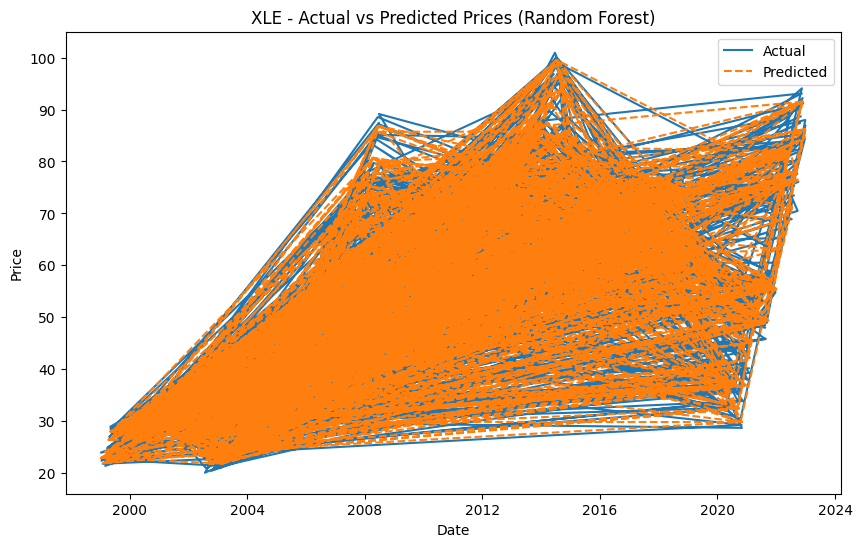

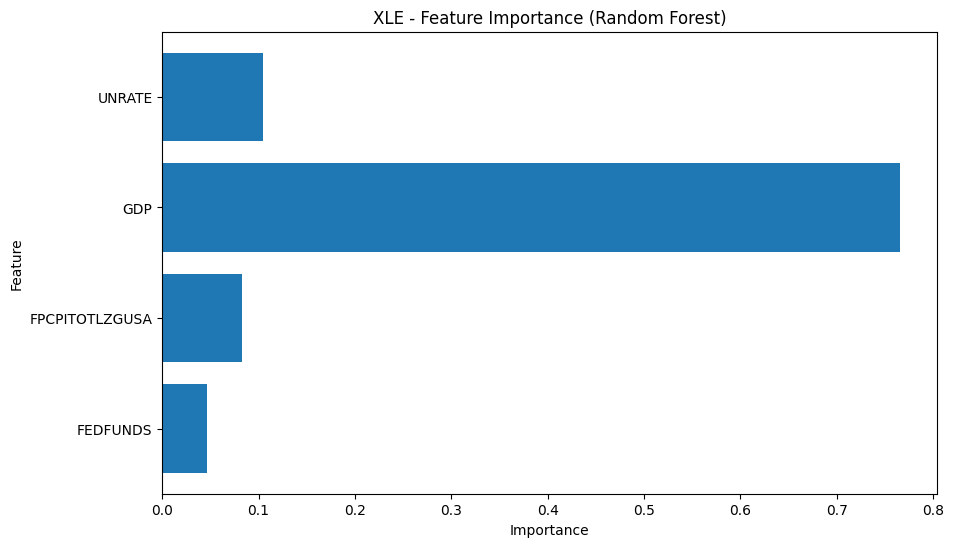

In [40]:
# Call the random_forest_regression_with_importance function for XLE
random_forest_regression_with_importance(xle_combined_df, 'XLE')

### Interpretation:

**XLE RMSE: 1.8364** <br>
This indicates that the model's predictions for XLE's close prices have an average error of approximately 1.84 units. This RMSE value suggests that the model performs reasonably well.

**Feature Importance**:

- GDP (importance: 0.766): GDP is the most important feature, accounting for 76.6 % of the variance in XLE's price prediction. This means that XLE's performance is highly sensitive to changes in GDP, likely because energy companies are heavily influenced by the overall economic activity.
- Unemployment Rate (Importance: 0.104): Unemployment rate also plays a significant role, contributing 10.4% to the model. 
- Inflation and Interest Rates have a lesser impact on the XLE price variance (8.3% - Inflation and 4.7% - Interest Rates)

XLK Random Forest RMSE: 1.7988354480825295
XLK Feature Importance:
FEDFUNDS: 0.015291708582575943
FPCPITOTLZGUSA: 0.004342606457107785
GDP: 0.9701558408940634
UNRATE: 0.010209844066252935


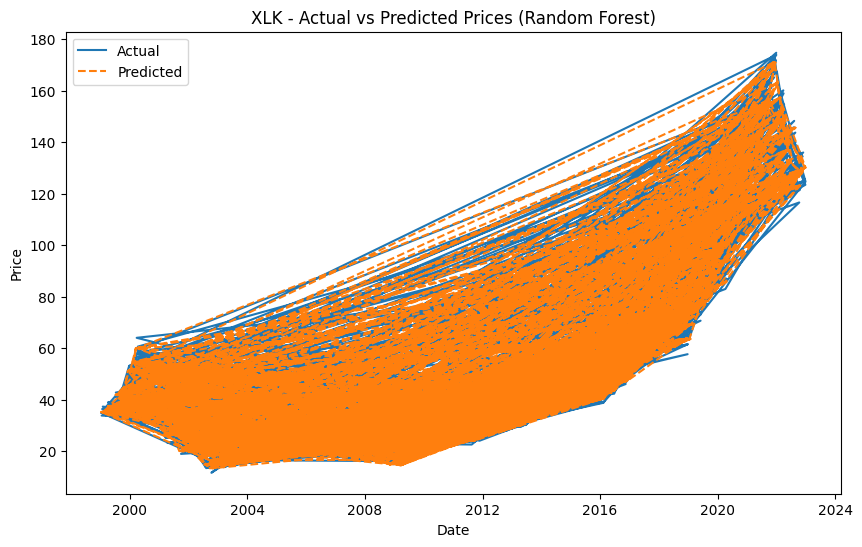

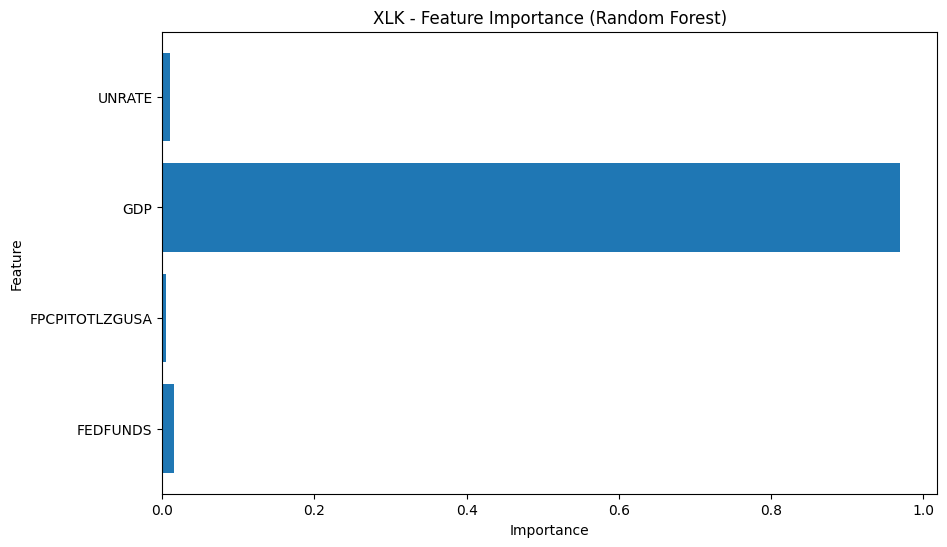

In [41]:
# Call the random_forest_regression_with_importance function for XLK
random_forest_regression_with_importance(xlk_combined_df, 'XLK')
# random_forest_regression_with_importance(xlv_combined_df, 'XLV')

### Interpretation:

**XLE RMSE: 1.7988** <br>
This indicates that the model's predictions for XLK's close prices have an average error of approximately 1.84 units. This RMSE value suggests that the model performs reasonably well.

**Feature Importance**:

- GDP (importance: 0.970): GDP is the most important feature, accounting for 97% of the variance in XLK's price prediction. This means that XLK's performance is highly sensitive to changes in GDP, likely because the technology sector is closely tied to economic growth.
- Unemployment Rate (Importance: 0.010): Unemployment contributes 1% to the model, indicating that employment levels have a small impact on the performance of the technology sector. 
- Inflation and Interest Rates have a minor impact on XLK (1.5% - Inflation and 0.4% - Interest Rates)

XLV Random Forest RMSE: 1.3304912335421168
XLV Feature Importance:
FEDFUNDS: 0.00307561242508286
FPCPITOTLZGUSA: 0.004863256572368578
GDP: 0.9826857922687655
UNRATE: 0.009375338733783002


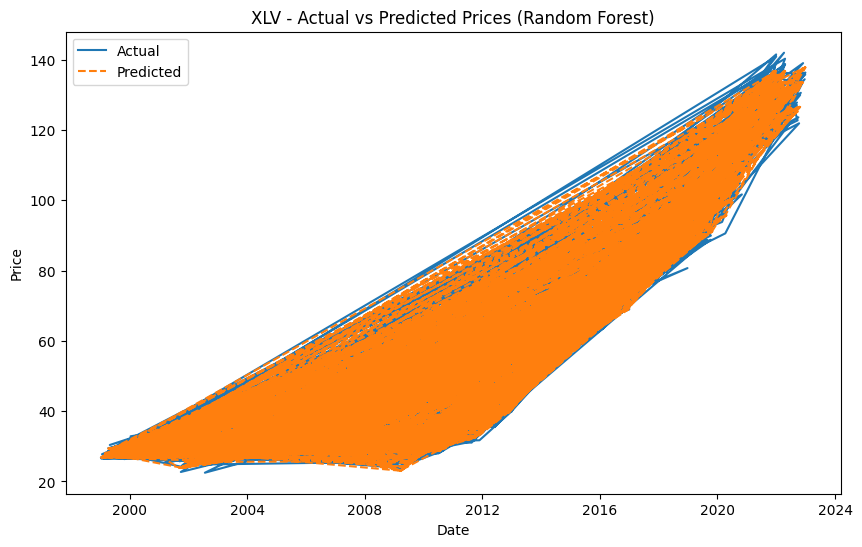

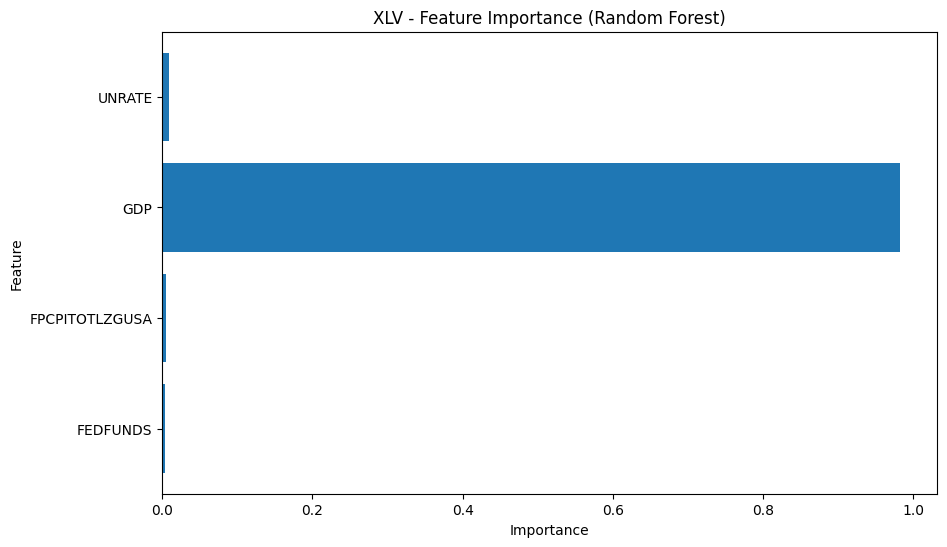

In [42]:
# Call the random_forest_regression_with_importance function for XLV
random_forest_regression_with_importance(xlv_combined_df, 'XLV')

### Interpretation:

**XLV RMSE: 1.3305** <br>
This indicates that the model's predictions for XLV's close prices have an average error of approximately 1.33 units. This RMSE value suggests that the model's predictions are quite accurate.

**Feature Importance**:

- GDP (importance: 0.983): GDP is the most important feature, accounting for 98.3% of the variance in XLV's price prediction. This means that healthcare sector XLV's is strongly influenced by overall economic growth.
- Unemployment Rate (Importance: 0.009): Unemployment contributes 0.9% to the model, indicating a very small impact on the healthcare sector's performance. 
- Inflation and Interest Rates have a minor impact on XLV (0.5% - Inflation and 0.3% - Interest Rates)

### Classification Model

In [43]:

# Function to build a classification model using additional economic data
def classify_sector_performance_with_additional_data(etf_combined_df, etf_name):
    """
    Function to apply classification on ETF's price movement (up/down) based on extended economic conditions.
    
    Parameters:
    etf_combined_df (pd.DataFrame): Dataframe containing 'close' prices and economic indicators.
    etf_name (str): Name of the ETF (e.g., 'XLE', 'XLK', 'XLV').
    
    Returns:
    None: Prints accuracy and classification report.
    """
    
    # Step 1: Define the target variable (1 for 'up', 0 for 'down')
    etf_combined_df['performance'] = np.where(etf_combined_df['close'].shift(-1) > 
                                              etf_combined_df['close'], 1, 0)
    
    # Step 2: Clean the dataset
    # Convert non-numeric data to NaN and then drop those rows
    etf_combined_df.replace('.', np.nan, inplace=True)
    etf_combined_df.dropna(inplace=True)
    
    # Step 3: Define the target and features
    target = etf_combined_df['performance']
    features = etf_combined_df[['FEDFUNDS', 'FPCPITOTLZGUSA', 'GDP', 'UNRATE', 
                                'CSCICP03USM665S', 'RSXFS', 'INDPRO', 'POILBREUSDM', 'DGS10']]
    
    # Convert all feature columns to numeric values
    features = features.apply(pd.to_numeric)
    
    # Step 4: Train-test split (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    
    # Step 5: Train the Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)
    
    # Step 6: Make predictions
    y_pred = rf_classifier.predict(X_test)
    
    # Step 7: Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{etf_name} Classification Accuracy: {accuracy}')
    print(f'{etf_name} Classification Report:')
    print(classification_report(y_test, y_pred))

In [44]:
# Example of how to call this function for XLE, XLK, or XLV
classify_sector_performance_with_additional_data(xle_combined_df, 'XLE')

XLE Classification Accuracy: 0.4925
XLE Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.45      0.46       569
           1       0.52      0.53      0.52       631

    accuracy                           0.49      1200
   macro avg       0.49      0.49      0.49      1200
weighted avg       0.49      0.49      0.49      1200



### Classification Accuracy

**Accuracy: 0.4925 (49.25)** <br>

The model correctly predicted whether XLE's price would go up or down 49.25% of the time. This is very close to random guessing (50%). Precision and recall are low for both upward and downward movements, with 0.46 for predicting a price decrease and 0.52 for predicting an increase. The F1-scores for both classes are similarly low, showing weak overall performance. This suggests that the economic indicators are not sufficient for accurately predicting XLE’s price movements. 

In [45]:
# Example of how to call this function for XLE, XLK, or XLV
classify_sector_performance_with_additional_data(xlk_combined_df, 'XLK')

XLK Classification Accuracy: 0.5008333333333334
XLK Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.43      0.44       556
           1       0.53      0.56      0.55       644

    accuracy                           0.50      1200
   macro avg       0.50      0.50      0.50      1200
weighted avg       0.50      0.50      0.50      1200



### Classification Accuracy

**Accuracy: 0.5008 (50.08%)**

The model's accuracy for predicting XLK price movements is 50.08%, which is close to random guessing. Precision and recall are low for both upward and downward movements, with slightly better performance for predicting upward movements (F1-score of 0.55). Overall, the model is unable to make reliable predictions based on the current features, showing weak performance. 

In [46]:
# Example of how to call this function for XLE, XLK, or XLV
classify_sector_performance_with_additional_data(xlv_combined_df, 'XLV')

XLV Classification Accuracy: 0.5216666666666666
XLV Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.48      0.49       561
           1       0.55      0.56      0.55       639

    accuracy                           0.52      1200
   macro avg       0.52      0.52      0.52      1200
weighted avg       0.52      0.52      0.52      1200



### Classification Accuracy

**Accuracy: 0.5216 (52.16%)**

The model's accuracy for predicting XLV price movements is 52.17%, slightly better than random guessing. It performs slightly better in predicting upward movements (F1-score of 0.55) than downward movements (F1-score of 0.49). Overall the model struggles to predict price movements. 

### Classification Model with Cross-Validation and Grid Search for Hyperparameter Tuning

In [47]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

def classify_with_cross_validation(etf_combined_df, etf_name):
    # Define the target and features
    etf_combined_df['performance'] = np.where(etf_combined_df['close'].shift(-1) > 
                                              etf_combined_df['close'], 1, 0)
    etf_combined_df.dropna(subset=['performance'], inplace=True)
    target = etf_combined_df['performance']
    features = etf_combined_df[['FEDFUNDS', 'FPCPITOTLZGUSA', 'GDP', 'UNRATE', 'CSCICP03USM665S', 
                                'RSXFS', 'INDPRO', 'POILBREUSDM', 'DGS10']]
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Define Random Forest Classifier
    rf_classifier = RandomForestClassifier(random_state=42)
    
    # Hyperparameter Grid for tuning
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    
    # GridSearchCV for hyperparameter tuning with cross-validation
    grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Best parameters from grid search
    print(f"Best Parameters: {grid_search.best_params_}")
    
    # Cross-Validation on the best model
    best_rf = grid_search.best_estimator_
    cv_scores = cross_val_score(best_rf, features, target, cv=5)
    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Mean CV Score: {cv_scores.mean()}")


In [48]:
# Call the function to classify with cross-validation and grid search - XLE
classify_with_cross_validation(xle_combined_df, 'XLE')

Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}
Cross-Validation Scores: [0.4875     0.51916667 0.49583333 0.48416667 0.50083333]
Mean CV Score: 0.49749999999999994


The best-performing Random Forest model has a max depth of 20, minimum samples split of 5, and 50 trees (n_estimators). The cross-validation accuracy scores range from 48.42% to 51.92%, indicating the model’s performance varies slightly across different subsets of the data. The mean cross-validation score is 49.75%, suggesting that even after tuning, the model's predictions are only slightly better than random guessing, indicating weak predictive power with the current features.

In [49]:
# Call the function to classify with cross-validation and grid search - XLK
classify_with_cross_validation(xlk_combined_df, 'XLK')

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Cross-Validation Scores: [0.46833333 0.43       0.44583333 0.50083333 0.53166667]
Mean CV Score: 0.4753333333333334


The best-performing Random Forest model has a max depth of 10, minimum samples split of 2, and 50 trees (n_estimators). The cross-validation scores range from 43.00% to 53.17%, showing moderate variation across the data splits. The mean cross-validation score is 47.53%, which is still below random guessing (50%), indicating that the model is not capturing strong patterns in the data.

In [50]:
# Call the function to classify with cross-validation and grid search - XLV
classify_with_cross_validation(xlv_combined_df, 'XLV')

Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 50}
Cross-Validation Scores: [0.48166667 0.41833333 0.39333333 0.45583333 0.51916667]
Mean CV Score: 0.4536666666666667


The best-performing Random Forest model has a max depth of 20, minimum samples split of 10, and 50 trees (n_estimators). The cross-validation scores vary significantly and range from 39.33% to 51.92%, indicating inconsistent performance across different subsets of the data. The mean cross-validation score is 45.37%, which is below random guessing (50%), suggesting that the model is struggling to find meaningful patterns in the current features.